In [2]:
import cv2 as cv
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual

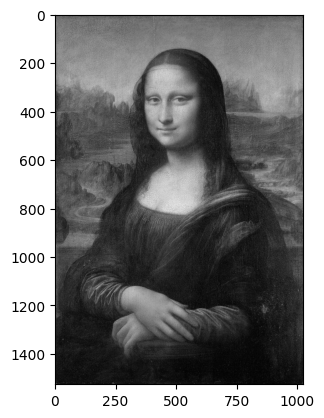

In [3]:
image = cv.imread('./monalisa.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, 'gray')

### Thresh functions

In [21]:
def simple_threshold(thresh):
    global image
    global simple_thresh_image
    th, simple_thresh_image = cv.threshold(image, thresh, 255, cv.THRESH_BINARY)
    fig, axes = plt.subplots(1, 2, figsize=(8,12))
    axes[0].imshow(image, 'gray')
    axes[1].imshow(simple_thresh_image, 'gray')

def adaptive_threshold(blockSize, c):
    global image
    global adaptive_thresh_image
    if(blockSize % 2 == 0):
        blockSize = blockSize+1
    adaptive_thresh_image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize, c)
    fig, axes = plt.subplots(1, 2, figsize=(8,12))
    axes[0].imshow(image, 'gray')
    axes[1].imshow(adaptive_thresh_image, 'gray')
    
# interactive(simple_threshold, thresh=(0,255))
interactive(adaptive_threshold, blockSize=(0,100), c=(0,255))


interactive(children=(IntSlider(value=50, description='blockSize'), IntSlider(value=127, description='c', max=…